<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    C = [0.5] + range(1, 5)
    degree = {'degree': [1,2,3]}
    grid = {'C': C}
    grid_poly = dict(grid, **degree)
    
    for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
        print "Trying kernel {}".format(kernel)
        if kernel != 'poly':
            grid_active = grid
        else:
            grid_active = grid_poly
        gs = GridSearchCV(estimator=SVC(kernel=kernel),
                          param_grid= grid_active,
                          cv=4, n_jobs=-1)
        gs.fit(x, y)
        accuracy = gs.best_score_
        if best_model != None:
            if accuracy > best_accuracy:
                best_model = gs.best_estimator_
                best_accuracy = accuracy
        else:
            best_model = gs.best_estimator_
            best_accuracy = accuracy

    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [4]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying kernel linear
Trying kernel rbf
Trying kernel poly
Trying kernel sigmoid
Best model SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.890000
Plotting data set points
Plotting decision region


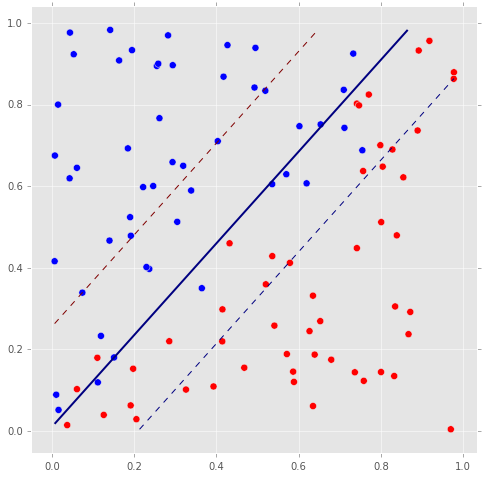

In [5]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying kernel linear
Trying kernel rbf
Trying kernel poly
Trying kernel sigmoid
Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.990000
Plotting data set points
Plotting decision region


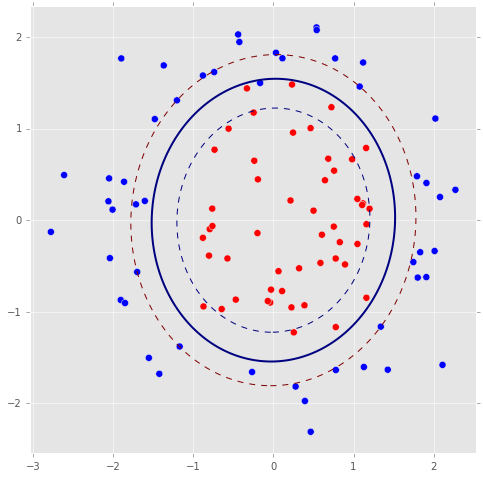

In [6]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying kernel linear
Trying kernel rbf
Trying kernel poly
Trying kernel sigmoid
Best model SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.920000
Plotting data set points
Plotting decision region


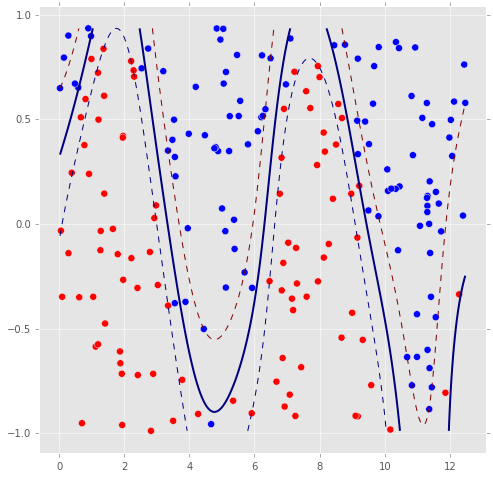

In [7]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [5]:
df_tc = pd.read_csv('titanium.csv')
df_tc = (df_tc - df_tc.mean()) / df_tc.std()
df_tc.head()

,x,y
0,-1.679650,-0.428220
1,-1.609665,-0.486883
2,-1.539679,-0.444219
3,-1.469694,-0.414887
4,-1.399708,-0.406888


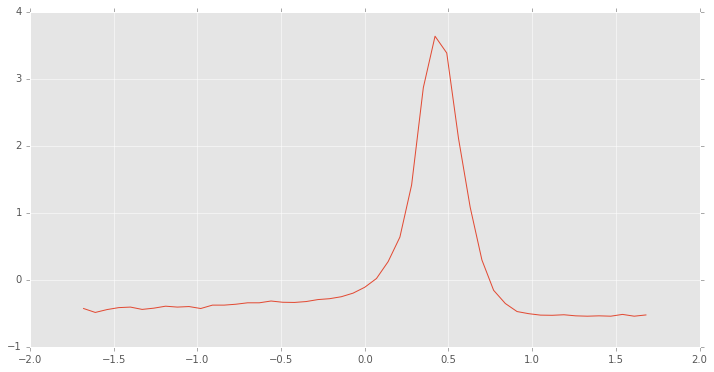

In [6]:
plt.plot(df_tc.x, df_tc.y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [7]:
from sklearn.metrics import mean_absolute_error

In [8]:
kernels = ['rbf', 'linear', 'poly']
C = np.logspace(-2, 2, 10)
x = df_tc.x.values.reshape(-1,1)
y = df_tc.y.values
scores = [[]]*len(kernels)
for i, kernel in enumerate(kernels):
    scores[i] = []
    for c in C:
        regr = SVR(kernel=kernel, C=c, degree=3, gamma=6, coef0=1, epsilon=0.01)
        regr.fit(x, y)
        scores[i].append(mean_absolute_error(y, regr.predict(x)))

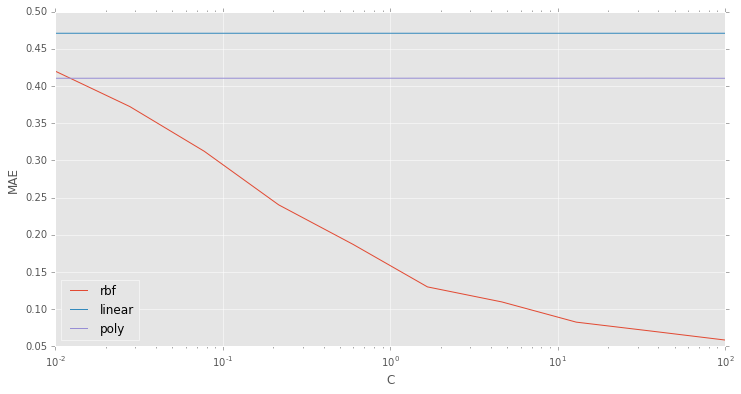

In [9]:
for i, kernel in enumerate(kernels):
    plt.plot(C, scores[i], label=kernel)
plt.legend(loc=3)
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('MAE')
plt.show()

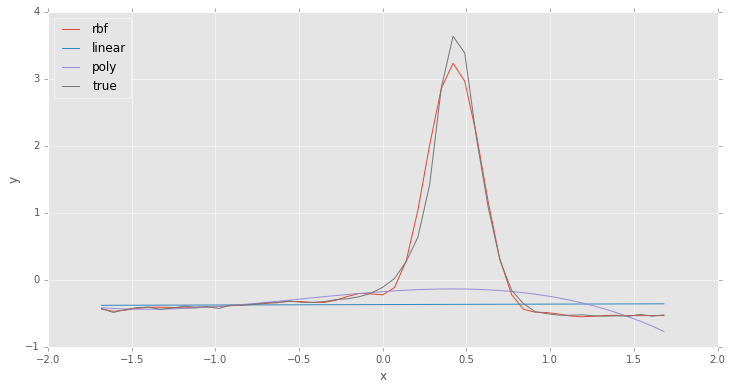

In [10]:
C_opt = {'rbf': 100, 'linear': 1, 'poly': 1}
for i, kernel in enumerate(kernels):
    regr = SVR(kernel=kernel, C=C_opt[kernel], degree=3, gamma=6, coef0=1, epsilon=0.01)
    regr.fit(x, y)
    plt.plot(x, regr.predict(x), label=kernel)
plt.plot(x, y, label='true')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [131]:
df = pd.read_csv('war_and_peace_es.txt', header=None, names=['word'])
df['label'] = 0
df_en = pd.read_csv('war_and_peace_en.txt', header=None, names=['word'])
df_en['label'] = 1
df = df.append(df_en)

In [52]:
print df.shape

(11403, 2)


In [53]:
df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklearn.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [130]:
from sklearn.model_selection import train_test_split

In [49]:
RND_SEED = 4263

In [132]:
df = df.sample(frac=1, random_state=RND_SEED)
df = df.reset_index(drop=True)[:1500]

In [83]:
print df.shape
df.head()

(1500, 2)


,word,label
0,always,1
1,anna,1
2,disse,0
3,any,1
4,opportunity,1


In [144]:
X_train, X_test, y_train, y_test = train_test_split(df.index.values, df.label.values,
                                                    train_size=0.6, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [114]:
import pylev
def string_kernel(U, V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            x = df.iloc[u].word
            y = df.iloc[v].word
            G[i, j] = np.exp(-6 * pylev.levenshtein(x, y)**2)
    return G

In [147]:
G = string_kernel(X_train, X_train)

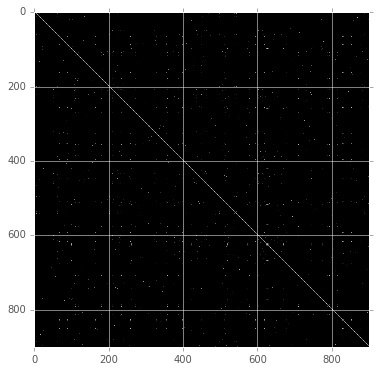

In [148]:
plt.imshow(G, cmap='nipy_spectral')

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [101]:
from sklearn.metrics import accuracy_score

In [149]:
G_test = string_kernel(X_test, X_train)

C=0.01, acc_train=0.518888888889, acc_test=0.57
C=0.0278255940221, acc_train=0.518888888889, acc_test=0.57
C=0.0774263682681, acc_train=0.593333333333, acc_test=0.63
C=0.215443469003, acc_train=0.677777777778, acc_test=0.686666666667
C=0.599484250319, acc_train=0.995555555556, acc_test=0.781666666667
C=1.6681005372, acc_train=0.995555555556, acc_test=0.781666666667
C=4.64158883361, acc_train=0.995555555556, acc_test=0.781666666667
C=12.9154966501, acc_train=0.995555555556, acc_test=0.781666666667
C=35.938136638, acc_train=0.995555555556, acc_test=0.781666666667
C=100.0, acc_train=0.995555555556, acc_test=0.781666666667


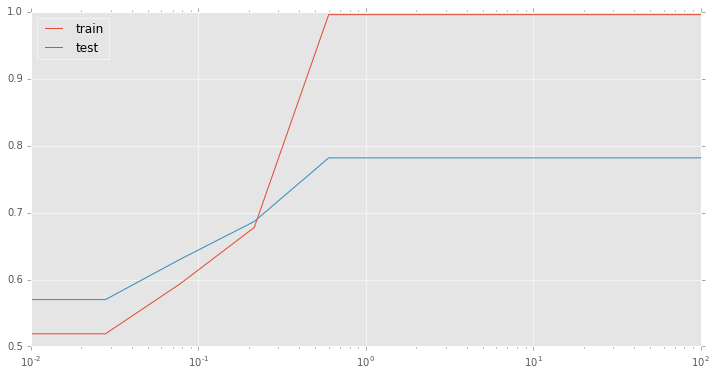

In [150]:
C = np.logspace(-2, 2, 10)
acc_scores_1 = []
acc_scores_2 = []
for c in C:
    clf = SVC(kernel='precomputed', C=c, random_state=RND_SEED)
    clf.fit(G, y_train)
    s1 = accuracy_score(y_train, clf.predict(G))
    s2 = accuracy_score(y_test, clf.predict(G_test))
    print "C={0}, acc_train={1}, acc_test={2}".format(c, s1, s2)
    acc_scores_1.append(s1)
    acc_scores_2.append(s2)
plt.plot(C, acc_scores_1, label='train')
plt.plot(C, acc_scores_2, label='test')
plt.legend(loc=2)
plt.xscale('log')
plt.show()